<a href="https://colab.research.google.com/github/lvlFarrukh/AI_LAB/blob/master/projectPunt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 450kB 33.0MB/s 
     |████████████████████████████████| 3.8MB 35.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lvlFarrukh/Dataset-csv/master/Dataset_6.csv')
label_for_test = pd.read_csv('https://raw.githubusercontent.com/lvlFarrukh/Dataset-csv/master/label.csv')

In [0]:
dataset = dataset.sample(frac=1)
data, labels = dataset.iloc[:,2:-1], dataset.iloc[:,-1:]
train_x, train_y = data[ : (data.shape[0] * 80) // 100], labels[ : (data.shape[0] * 80) // 100]
test_x, test_y = data[ (data.shape[0] * 80) // 100 : (data.shape[0] * 95) // 100], labels[(data.shape[0] * 80) // 100 : (data.shape[0] * 95) // 100]
val_x, val_y = data[ (data.shape[0] * 95) // 100 : ], labels[ (data.shape[0] * 95) // 100 :]

In [36]:
train_x

,venueMnemonics,Type,Race,Rank,Runner,Race Distance,Venue_Name,Race Class,Fixed Open Price,Fixed Win Price,Fixed Win Price Variance,Fixed Place Price,Parimutuel Win,Parimutuel Place,Finishing Position,Betting Status,Number of runners,Fixed Open Price Order,weatherCondition,trackCondition,Odd Category,Win,Placed,Top4,String,RaceType,Cost
25459,3,0,3,1,2,1050,36,124.0,2.5,1.90,-0.60,1.16,1.9,1.20,1.0,2,11,2.0,0,0,1,1.0,1.0,1.0,1301,2,2500
57521,1,0,4,5,1,1400,104,69.0,4.4,8.00,3.60,2.40,9.6,2.50,1.0,2,12,4.0,0,0,2,1.0,1.0,1.0,4140,2,286
990,5,0,0,1,12,1100,27,15.0,2.7,1.95,-0.75,1.16,1.9,1.04,1.0,2,9,2.0,0,2,1,1.0,1.0,1.0,946,2,2500
18257,5,0,9,4,8,1000,13,6.0,9.0,7.00,-2.00,1.50,9.4,1.70,2.0,1,8,6.0,0,3,1,0.0,1.0,1.0,399,2,800
25409,6,2,0,3,3,1000,95,13.0,6.5,3.80,-2.70,1.55,4.1,1.90,0.0,0,12,5.0,0,6,1,0.0,0.0,0.0,3745,2,727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55307,3,0,5,2,1,1600,3,38.0,4.4,4.40,0.00,2.00,4.9,2.70,0.0,0,7,3.0,1,0,2,0.0,0.0,0.0,2678,2,400
49003,3,0,4,1,2,1400,3,38.0,6.0,6.50,0.50,2.40,5.8,2.80,0.0,0,7,4.0,1,0,2,0.0,0.0,0.0,2675,2,286
32608,4,0,2,3,4,900,130,16.0,15.0,4.20,-10.80,1.55,4.1,1.40,4.0,0,8,3.0,1,19,1,0.0,0.0,1.0,5190,1,727
20635,4,0,3,4,9,2100,10,0.0,8.0,13.00,5.00,2.90,13.6,3.00,0.0,0,11,7.0,0,1,2,0.0,0.0,0.0,300,1,211


In [0]:
def data_normalization(dataset):
  data = np.array(dataset)
  data_mean = dataset.mean(axis=0)
  data -= data_mean
  data /= data.std(axis=0)
  return data

In [0]:
train_x = data_normalization(train_x)
test_x = data_normalization(test_x)
val_x = data_normalization(val_x)
train_y = np.array(train_y)
test_y = np.array(test_y)
val_y = np.array(val_y)

In [0]:
train_x, train_y, test_x, test_y,val_x, val_y = train_x.astype(float), train_y.astype(float), test_x.astype(float), test_y.astype(float), val_x.astype(float), val_y.astype(float) 

In [0]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(train_x.shape[1],)))
network.add(tf.keras.layers.Dense(128, activation='tanh'))
network.add(tf.keras.layers.Dense(256, activation='tanh'))
network.add(tf.keras.layers.Dense(96, activation='relu'))
network.add(tf.keras.layers.Dense(64, activation='relu'))
network.add(tf.keras.layers.Dense(1))

In [0]:
network.compile(optimizer='RMSprop', loss=tf.keras.losses.mse, metrics=['mae'])

In [44]:
history = network.fit(train_x, train_y, epochs=100, batch_size=512, validation_data=(val_x, val_y))

Train on 60132 samples, validate on 3759 samples
Epoch 1/100
60132/60132 [==============================] - 2s 36us/sample - loss: 2176572.4379 - mae: 438.4445 - val_loss: 1782004.0924 - val_mae: 253.9893
Epoch 2/100
60132/60132 [==============================] - 1s 23us/sample - loss: 1180081.1702 - mae: 174.5527 - val_loss: 997403.4166 - val_mae: 138.3877
Epoch 3/100
60132/60132 [==============================] - 1s 22us/sample - loss: 719631.7697 - mae: 120.9537 - val_loss: 608657.2949 - val_mae: 103.3481
Epoch 4/100
60132/60132 [==============================] - 1s 22us/sample - loss: 451844.3424 - mae: 103.4921 - val_loss: 437722.8953 - val_mae: 181.0185
Epoch 5/100
60132/60132 [==============================] - 1s 22us/sample - loss: 284507.9016 - mae: 90.7639 - val_loss: 236878.2714 - val_mae: 88.4200
Epoch 6/100
60132/60132 [==============================] - 1s 23us/sample - loss: 195593.5667 - mae: 82.6652 - val_loss: 137463.3387 - val_mae: 79.8140
Epoch 7/100
60132/60132 [===

In [45]:
network.evaluate(test_x, test_y)

11274/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[88689.74515278863, 62.068962]

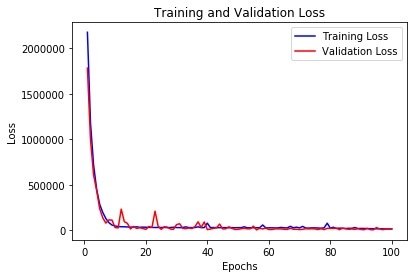

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label = "Training Loss")
plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()